In [ ]:
import numpy as np

In [ ]:
#Define shapes for input, output and hidden layers
def def_shapes(X, Y):
  input_unit = X.shape[0]
  #Two hidden layers with 3 and 2 neurons respectively
  hidden_units_1 = 3
  hidden_units_2 = 2
  output_unit = Y.shape[0]
  return (input_unit, hidden_units_1, hidden_units_2, output_unit)

In [ ]:
#Initialize weights of the model
def param_init(input_unit, hidden_units_1, hidden_units_2, output_unit):
    np.random.seed(2)
    #Input to first hidden layer weights and bias
    W1 = np.random.randn(hidden_units_1, input_unit)*0.01
    b1 = np.zeros((hidden_units_1, 1))
    #First to second hidden layer weights and bias
    W2 = np.random.randn(hidden_units_2, hidden_units_1)*0.01
    b2 = np.zeros((hidden_units_2, 1))
    #Second hidden layer to output layer weights and bias
    W3 = np.random.randn(output_unit, hidden_units_2)*0.01
    b3 = np.zeros((output_unit, 1))
    #Store the weights into a dictionary
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [ ]:
#Define sigmoid activation function
def sigmoid(z):
    return 1/(1+np.exp(-z))

#Forward propagation pass of the model
def forward_prop(X, parameters):
  #Get the weights and biases
  W1 = parameters['W1']
  b1 = parameters['b1']
  W2 = parameters['W2']
  b2 = parameters['b2']
  W3 = parameters['W3']
  b3 = parameters['b3']
  #Input to hidden layer pass  
  Z1 = np.dot(W1, X) + b1
  A1 = sigmoid(Z1)
  #1st to 2nd layer pass
  Z2 = np.dot(W2, A1) + b2
  A2 = sigmoid(Z2)
  #2nd to output layer pass
  Z3 = np.dot(W3, A2) + b3
  A3 = Z3
  #Store the activations into cache
  cache = {"Z1": Z1,"A1": A1,"Z2": Z2,"A2": A2, "Z3": Z3, "A3": A3}
  
  return A3, cache

In [ ]:
#Loss function of the model
def mse(A3, Y):
  #Using Mean Square Error as the loss
  cost = np.mean(np.power(Y - A3, 2))                     
  return cost

In [ ]:
#Backward propagation to calculate the gradients of the weights and biases
def backprop(parameters, cache, X, Y):
    #Total examples in the dataset
    m = X.shape[1]
    #Get weights and activations
    W1 = parameters['W1']
    W2 = parameters['W2']
    W3 = parameters['W3']
    A1 = cache['A1']
    A2 = cache['A2']
    A3 = cache['A3']
    #Gradients of the output and second hidden layer
    dZ3 = A3-Y
    dW3 = (1/m) * np.dot(dZ3, A2.T)
    db3 = (1/m) * np.sum(dZ3, axis=1, keepdims=True)
   #Gradients of the first hidden layer weights
    dZ2 = np.multiply(np.dot(W3.T, dZ3), A2 * (1-A2))
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    #Gradients of the input layer weights
    dZ1 = np.multiply(np.dot(W2.T, dZ2), A1 * (1-A1))
    dW1 = (1/m) * np.dot(dZ1, X.T) 
    db1 = (1/m)*np.sum(dZ1, axis=1, keepdims=True)
    #Store all the gradients
    grads = {"dW1": dW1, "db1": db1, "dW2": dW2,"db2": db2, "dW3": dW3, "db3": db3}
    
    return grads

In [ ]:
#Gradient Descent to update the weights
def grad_des(parameters, grads, learning_rate = 0.01):
  #Get weights and biases
  W1 = parameters['W1']
  b1 = parameters['b1']
  W2 = parameters['W2']
  b2 = parameters['b2']
  W3 = parameters['W3']
  b3 = parameters['b3']
  #Get the gradients
  dW1 = grads['dW1']
  db1 = grads['db1']
  dW2 = grads['dW2']
  db2 = grads['db2']
  dW3 = grads['dW3']
  db3 = grads['db3']
  #Update the weights and biases using gradients
  W1 = W1 - learning_rate * dW1
  b1 = b1 - learning_rate * db1
  W2 = W2 - learning_rate * dW2
  b2 = b2 - learning_rate * db2
  W3 = W3 - learning_rate * dW3
  b3 = b3 - learning_rate * db3
  #Store the resultant parameters
  parameters = {"W1": W1, "b1": b1,"W2": W2,"b2": b2, "W3": W3, "b3": b3}
  
  return parameters

In [ ]:
#Define the model and training loop
def model(X, Y, num_iterations = 100):
  #Set random seed
  np.random.seed(3)
  #Get the shapes of the layers
  input_unit, hidden_units_1, hidden_units_2, output_unit = def_shapes(X, Y)
  #Initialize the weights and biases
  parameters = param_init(input_unit, hidden_units_1, hidden_units_2, output_unit)
  #Variable to store cost history
  cost_hist = []
  #Loop over the epochs
  for i in range(0, num_iterations):
    #Forward pass
    A3, cache = forward_prop(X, parameters)
    #Calculate loss
    cost = mse(A3, Y)
    cost_hist.append(cost)
    #Calculate gradients
    grads = backprop(parameters, cache, X, Y)
    #Update the weights
    parameters = grad_des(parameters, grads)
    #Display cost after 5 iterations
    if i % 5 == 0:
        print ("Cost after iteration %i: %f" %(i, cost))
  return parameters, cost_hist

In [ ]:
#Dummy dataset
X = np.linspace(0,1,100).reshape(-1,1).T
Y = np.square(X)
#Training epochs
iter = 100
#Model training
parameters, cost_hist = model(X, Y, num_iterations=iter)

Cost after iteration 0: 0.204235
Cost after iteration 5: 0.188358
Cost after iteration 10: 0.174702
Cost after iteration 15: 0.162957
Cost after iteration 20: 0.152856
Cost after iteration 25: 0.144167
Cost after iteration 30: 0.136695
Cost after iteration 35: 0.130268
Cost after iteration 40: 0.124740
Cost after iteration 45: 0.119986
Cost after iteration 50: 0.115897
Cost after iteration 55: 0.112380
Cost after iteration 60: 0.109356
Cost after iteration 65: 0.106755
Cost after iteration 70: 0.104519
Cost after iteration 75: 0.102596
Cost after iteration 80: 0.100942
Cost after iteration 85: 0.099519
Cost after iteration 90: 0.098296
Cost after iteration 95: 0.097245


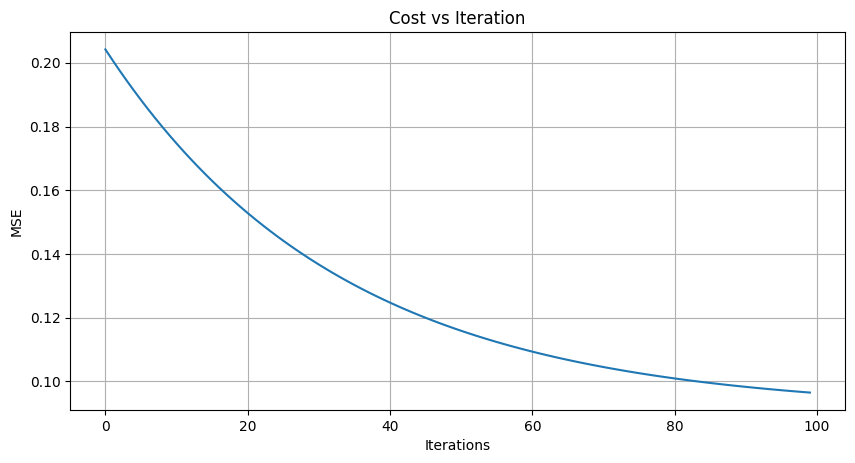

In [ ]:
#Visualize the cost over each training epoch
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5), dpi=100)
plt.plot(np.arange(0,iter), cost_hist)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title('Cost vs Iteration')
plt.show()